<div style='font-size: 32px; font-style: oblique; font-weight: bold'>
    Fossil Fuel Plants vs. the Power of Nature
    </div>

## *Imports*

In [1]:
import pandas as pd
import numpy as np
import re

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import linregress

Read the data >> 

In [2]:
solar = pd.read_excel("Datasets/environment/Global-Solar-Power-Tracker-May-2022.xlsx", sheet_name=1)
wind = pd.read_excel("Datasets/environment/Global-Wind-Power-Tracker-May-2022.xlsx", sheet_name=1)
coal = pd.read_excel("Datasets/environment/Global-Coal-Plant-Tracker-July-2022.xlsx", sheet_name=1)
gas = pd.read_excel("Datasets/environment/Global-Gas-Plant-Tracker-July-2022.xlsx", sheet_name=3)

**! IMPORTANT NOTES !**  


- There are a lot of duplicates in this data and I don't know about its nature. I realized this too late so I couldn't dive into this issue: I had to submit the project.

- I also didn't make proper notes because it was such a rush. I am sorry that anyone who will want to read through it will have to figure out what each line does on his own.  

- Some part of this code wasn't used in the final version of the project.

# **Preprocessing**

### Solar

In [3]:
# Drop the unnecessary columns
solar = solar[["Country","Project Name","Capacity (MW)","Status","Start year","Retired year", "Latitude", "Longitude"]]

In [4]:
solar.columns = solar.columns.str.lower()

In [5]:
solar.rename(columns={"project name":"plant_name","capacity (mw)":"capacity", "start year":"start_year", "retired year":"retired_year"}, inplace=True)

In [6]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9331 entries, 0 to 9330
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       9331 non-null   object 
 1   plant_name    9331 non-null   object 
 2   capacity      9331 non-null   int64  
 3   status        9331 non-null   object 
 4   start_year    6326 non-null   float64
 5   retired_year  5 non-null      float64
 6   latitude      9331 non-null   float64
 7   longitude     9331 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 583.3+ KB


Keep only active plants >>

In [7]:
legit_status = ["operating","construction","retired","mothballed"]

data_s = solar.copy()
data_s = data_s.query("status in @legit_status")

Fill missing values with the mean >>

In [8]:
data_s.start_year.fillna(data_s.start_year.mean(), inplace=True)

# Store year numbers as integers
data_s.start_year = data_s.start_year.astype(int)

In [9]:
data_s["plant_type"] = "solar"

In [10]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5771 entries, 0 to 9330
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       5771 non-null   object 
 1   plant_name    5771 non-null   object 
 2   capacity      5771 non-null   int64  
 3   status        5771 non-null   object 
 4   start_year    5771 non-null   int64  
 5   retired_year  0 non-null      float64
 6   latitude      5771 non-null   float64
 7   longitude     5771 non-null   float64
 8   plant_type    5771 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 450.9+ KB


### Wind

In [11]:
# Drop the unnecessary columns
wind = wind[["Country","Project Name","Capacity (MW)","Status","Start year","Retired year", "Latitude", "Longitude"]]

In [12]:
wind.columns = wind.columns.str.lower()

In [13]:
wind.rename(columns={"project name":"plant_name","capacity (mw)":"capacity", "start year":"start_year", "retired year":"retired_year"}, inplace=True)

In [14]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20191 entries, 0 to 20190
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       20191 non-null  object 
 1   plant_name    20191 non-null  object 
 2   capacity      20191 non-null  int64  
 3   status        20191 non-null  object 
 4   start_year    14450 non-null  float64
 5   retired_year  142 non-null    float64
 6   latitude      20191 non-null  float64
 7   longitude     20191 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [15]:
data_w = wind.copy()
data_w = data_w.query("status in @legit_status")

In [16]:
data_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14335 entries, 0 to 20190
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       14335 non-null  object 
 1   plant_name    14335 non-null  object 
 2   capacity      14335 non-null  int64  
 3   status        14335 non-null  object 
 4   start_year    13198 non-null  float64
 5   retired_year  142 non-null    float64
 6   latitude      14335 non-null  float64
 7   longitude     14335 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1007.9+ KB


In [17]:
data_w.start_year.fillna(data_w.start_year.mean(), inplace=True)

# Store year numbers as integers
data_w.start_year = data_w.start_year.astype(int)

In [18]:
data_w["plant_type"] = "wind"

In [19]:
data_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14335 entries, 0 to 20190
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       14335 non-null  object 
 1   plant_name    14335 non-null  object 
 2   capacity      14335 non-null  int64  
 3   status        14335 non-null  object 
 4   start_year    14335 non-null  int64  
 5   retired_year  142 non-null    float64
 6   latitude      14335 non-null  float64
 7   longitude     14335 non-null  float64
 8   plant_type    14335 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


### Gas

In [20]:
gas = gas[["Country","Plant name","Capacity elec. (MW)","Status","Start year","Retired year", "Latitude", "Longitude"]]

In [21]:
gas.columns = gas.columns.str.lower()

In [22]:
gas.columns

Index(['country', 'plant name', 'capacity elec. (mw)', 'status', 'start year',
       'retired year', 'latitude', 'longitude'],
      dtype='object')

In [23]:
gas.rename(columns={"plant name":"plant_name","capacity elec. (mw)":"capacity", "start year":"start_year", "retired year":"retired_year"}, inplace=True)

In [24]:
def start_year(string):
    pattern_1 = "[0-9]{2,4}"
    pattern_2 = "[0-9]{2,4}$"
    search_1 = re.match(pattern_1, str(string))
    search_2 = re.search(pattern_2, str(string))
    try:
        first = search_1.group(0)
        second = search_2.group(0)
        if len(second) < 4:
            result = first[:2] + second
            return result
        else:
            return first
    except:
        return None

In [25]:
gas["start_year"] = gas["start_year"].apply(start_year)

In [26]:
mean_gas_started_year = round(gas[gas.start_year.notnull()].start_year.astype(int).mean())

gas["start_year"].fillna(mean_gas_started_year, inplace=True)

gas["start_year"] = gas["start_year"].astype(int)

In [27]:
def remove_comma(string):
    return re.sub("[^\d]", "", str(string))

In [28]:
gas.capacity = gas.capacity.apply(remove_comma)

gas = gas[gas.capacity != ""]

gas.capacity = gas.capacity.astype(int)

In [29]:
gas.status.unique()

array(['operating', 'mothballed', 'cancelled', 'construction',
       'announced', 'shelved', 'pre-construction', 'retired'],
      dtype=object)

In [30]:
data_g = gas.copy()
data_g = data_g.query("status in @legit_status")

In [31]:
data_g.retired_year = pd.to_numeric(data_g.retired_year, errors="coerce")

In [32]:
data_g["plant_type"] = "gas"

In [33]:
data_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8100 entries, 0 to 9563
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       8100 non-null   object 
 1   plant_name    8100 non-null   object 
 2   capacity      8100 non-null   int64  
 3   status        8100 non-null   object 
 4   start_year    8100 non-null   int64  
 5   retired_year  82 non-null     float64
 6   latitude      8100 non-null   float64
 7   longitude     8100 non-null   float64
 8   plant_type    8100 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 632.8+ KB


### Coal

In [34]:
coal = coal[["Country","Plant","Capacity (MW)","Status","Year","RETIRED", "Latitude", "Longitude"]]

In [35]:
coal.columns = coal.columns.str.lower()

In [36]:
coal.rename(columns={"plant":"plant_name","capacity (mw)":"capacity", "year":"start_year", "retired":"retired_year"}, inplace=True)

In [37]:
coal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       13491 non-null  object 
 1   plant_name    13491 non-null  object 
 2   capacity      13491 non-null  float64
 3   status        13491 non-null  object 
 4   start_year    9862 non-null   object 
 5   retired_year  2623 non-null   object 
 6   latitude      13491 non-null  float64
 7   longitude     13491 non-null  float64
dtypes: float64(3), object(5)
memory usage: 843.3+ KB


In [38]:
data_c = coal.copy()
data_c = data_c.query("status in @legit_status")

In [39]:
def start_year_2(string):
    pattern = "[0-9]{2,4}"
    match = re.match(pattern, str(string))
    try:
        return match.group(0)
    except:
        return None

In [40]:
data_c.start_year = data_c.start_year.apply(start_year_2)

In [41]:
mean_coal_started_year = round(data_c[data_c.start_year.notnull()].start_year.astype(int).mean())

data_c["start_year"].fillna(mean_coal_started_year, inplace=True)

data_c[["start_year","capacity"]] = data_c[["start_year","capacity"]].astype(int)

In [42]:
data_c["plant_type"] = "coal"

In [43]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9747 entries, 16 to 13490
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       9747 non-null   object 
 1   plant_name    9747 non-null   object 
 2   capacity      9747 non-null   int64  
 3   status        9747 non-null   object 
 4   start_year    9747 non-null   int64  
 5   retired_year  2623 non-null   object 
 6   latitude      9747 non-null   float64
 7   longitude     9747 non-null   float64
 8   plant_type    9747 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 761.5+ KB


### Creating a master dataset

In [44]:
datasets = [data_s, data_w, data_g, data_c]

data = pd.concat(datasets)

# Fill in the None ritered_year with an infinite value
data.retired_year.fillna(np.inf, inplace=True)

data.retired_year = pd.to_numeric(data.retired_year, errors='coerce')

In [45]:
data.country.replace({"DR Congo":"Congo","Republic of the Congo":"Congo", "Macao ":"Macao"}, inplace=True)

In [46]:
import pycountry

countries = {}

for country in pycountry.countries:
    countries[country.name] = country.alpha_3
countries["Laos"] = "LAO"
countries["South Korea"] = "KOR"
countries["Taiwan"] = "TWN"
countries["Vietnam"] = "VNM"
countries["Russia"] = "RUS"
countries["Czech Republic"] = "CZE"
countries["Holy See"] = "Vat"
countries["Iran"] = "IRN"
countries["Syria"] = "SYR"
countries["Bolivia"] = "BOL"
countries["Kosovo"] = "BGR"
countries["Venezuela"] = "VEN"
countries["Moldova"] = "MDA"
countries["Tanzania"] = "TZA"
countries["Palestine"] = "PSE"
countries["Brunei"] = "BRN"
countries["North Korea"] = "PRK"

In [47]:
def get_iso(string):
    return countries[string]

In [48]:
data["country_iso"] = data.country.apply(get_iso)

In [49]:
data.to_csv("power_plants_data.csv")

# **Pivot data for plotting**

Create a filter for further use >>

In [50]:
def filtered_data(data=data,year=2022):
    return (data[(data.start_year <= year) & (data.retired_year > year)]
            .drop_duplicates(subset=["plant_name","latitude","longitude","capacity"], keep='last'))

### Total capacity for all time

In [51]:
countries_capacity = pd.pivot_table(data, index='country_iso', values='capacity', aggfunc="sum")

In [52]:
countries_capacity.to_csv("countries_capacity.csv")

### The state in 2022

In [53]:
shares_2022 = pd.pivot_table(filtered_data(), index="plant_type", values="capacity", aggfunc=["sum","count"]).reset_index()
shares_2022.columns = ["Plant type","Total capacity","Quantity"]
shares_2022.to_csv("Final Datasets/shares_2022.csv")

Number of countries that use solar and wind-powered plants >>

In [54]:
filtered_data().query("plant_type == 'wind' or plant_type == 'solar'").country.nunique()

142

Number of countries that use gas and coal-powered plants >>

In [55]:
filtered_data().query("plant_type == 'coal' or plant_type == 'gas'").country.nunique()

128

### Capacity dynamics

In [56]:
min_year = data['start_year'].min()
max_year = 2022

In [57]:
dictionary = {
    "year":[],
    "type":[],
    "quantity":[],
    "capacity":[]
}

for year in range(min_year, max_year, 1):
    
    for plant_type in data.plant_type.unique():
        
        dictionary["year"].append(year)
        dictionary["type"].append(plant_type)
        dictionary["quantity"].append(data[
                (data.start_year <= year) & 
                (data.retired_year > year) & 
                (data.plant_type == plant_type)].capacity.count())
        dictionary["capacity"].append(data[
                (data.start_year <= year) & 
                (data.retired_year > year) & 
                (data.plant_type == plant_type)].capacity.sum())

In [58]:
dynamics = pd.DataFrame.from_dict(dictionary)

In [59]:
dynamics.to_csv("Final Datasets/dynamics.csv")

In [60]:
capacity_dynamics = dynamics.query("year > 2010")

capacity_dinamics_solar = capacity_dynamics.query("type == 'solar'")
capacity_dinamics_wind = capacity_dynamics.query("type == 'wind'")
capacity_dinamics_gas = capacity_dynamics.query("type == 'gas'")
capacity_dinamics_coal = capacity_dynamics.query("type == 'coal'")

In [61]:
dataframes = [capacity_dinamics_solar,capacity_dinamics_wind,capacity_dinamics_gas,capacity_dinamics_coal]

In [62]:
def trend_extended(dataframe):
    slope, intercept, r_value, p_value, std_err = linregress(x=dataframe.year, y=dataframe.capacity)
    dataframe['trend'] = slope * dataframe.year + intercept
    
    if (dataframe.trend.iloc[-2] - dataframe.trend.iloc[-1]) < (dataframe.trend.iloc[-1] - dataframe.trend.iloc[-2]):
        step = dataframe.trend.iloc[-2] - dataframe.trend.iloc[-1]
    else:
        step = - (dataframe.trend.iloc[-2] - dataframe.trend.iloc[-1])
    
    for year in np.arange(2022, 2032, 1):
        dataframe = dataframe.append({"year":year, "type":dataframe.type.iloc[-1], "trend": dataframe.trend.iloc[-1] - step}, ignore_index=True)
    return dataframe

In [63]:
capacity_dynamics = pd.concat(
    [trend_extended(capacity_dinamics_solar),
     trend_extended(capacity_dinamics_wind),
     trend_extended(capacity_dinamics_gas),
     trend_extended(capacity_dinamics_coal)]
)

In [64]:
capacity_dynamics.to_csv("Final Datasets/capacity_dynamics.csv")

In [65]:
def trend_extended_numbers(dataframe):
    slope, intercept, r_value, p_value, std_err = linregress(x=dataframe.year, y=dataframe.quantity)
    dataframe['trend'] = slope * dataframe.year + intercept
    
    if (dataframe.trend.iloc[-2] - dataframe.trend.iloc[-1]) < (dataframe.trend.iloc[-1] - dataframe.trend.iloc[-2]):
        step = dataframe.trend.iloc[-2] - dataframe.trend.iloc[-1]
    else:
        step = - (dataframe.trend.iloc[-2] - dataframe.trend.iloc[-1])
    
    for year in np.arange(2022, 2032, 1):
        dataframe = dataframe.append({"year":year, "type":dataframe.type.iloc[-1], "trend": dataframe.trend.iloc[-1] - step}, ignore_index=True)
    return dataframe

In [66]:
numbers_dynamics = pd.concat(
    [trend_extended_numbers(capacity_dinamics_solar),
     trend_extended_numbers(capacity_dinamics_wind),
     trend_extended_numbers(capacity_dinamics_gas),
     trend_extended_numbers(capacity_dinamics_coal)]
)

In [67]:
numbers_dynamics.to_csv("Final Datasets/numbers_dynamics.csv")

### Solar and wind power capacity by countries

In [68]:
wind_by_country = pd.pivot_table(
    filtered_data().query("plant_type == 'wind'"), 
    index=["country","country_iso"],
    values="capacity",
    aggfunc="sum"
).reset_index()

wind_by_country.capacity = np.log(wind_by_country.capacity)

In [69]:
wind_by_country.to_csv("Final Datasets/wind_by_country.csv")

In [70]:
solar_by_country = pd.pivot_table(
    filtered_data().query("plant_type == 'solar'"), 
    index=["country","country_iso"],
    values="capacity",
    aggfunc="sum"
).reset_index()

solar_by_country.capacity = np.log(solar_by_country.capacity)

In [71]:
solar_by_country.to_csv("Final Datasets/solar_by_country.csv")

### Solar+wind VS fossil fuel rate

In [72]:
green_rate = (pd
 .pivot_table(filtered_data(), index="country", values="capacity", columns="plant_type", aggfunc="sum")
 .reset_index()
 .fillna(0)
)

In [73]:
def get_green_rate(data):
    fossil = data["coal"] + data["gas"]
    green = data["solar"] + data["wind"]
            
    if (fossil > 0) & (green > 0):
        return green / fossil
    elif (fossil == 0) & (green > 0):
        return 1
    else:
        return 0

In [74]:
green_rate["rate"] = green_rate.apply(get_green_rate, axis=1)

In [75]:
green_top_10 = green_rate.sort_values(by="rate", ascending=False).head(10)

In [76]:
green_top_10.to_csv("Final Datasets/green_top_10.csv")

### Plants' location

In [77]:
(pd
 .pivot_table(filtered_data().query("plant_type == 'solar'"), index=['plant_type','plant_name','latitude','longitude'], values="capacity", aggfunc="sum")
 .reset_index()
 .to_csv("Final Datasets/solar_plants_location.csv")
)

In [78]:
# wind_plants_location = (pd
#  .pivot_table(filtered_data().query("plant_type == 'wind'"), index=['plant_type','plant_name','latitude','longitude'], values="capacity", aggfunc="sum")
#  .reset_index()
# )

### Capacity vs population

In [79]:
current_capacity = pd.pivot_table(filtered_data(), index=["country","country_iso"], values="capacity", aggfunc="sum").reset_index()

In [80]:
population_data = pd.read_csv("population_data.csv")

population_data = population_data[["Country (or dependency)","Population (2020)"]]

population_data.columns = ['country', 'population']

In [81]:
capacity_vs_population = current_capacity.merge(population_data, how='left')

In [82]:
capacity_vs_population.loc[16, 'population'] = 25987
capacity_vs_population.loc[36, 'population'] = 10700000
capacity_vs_population.loc[46, 'population'] = 48865
capacity_vs_population.loc[74, 'population'] = 1873000
capacity_vs_population.loc[112, 'population'] = 4803000
capacity_vs_population.loc[122, 'population'] = 53192
capacity_vs_population.loc[161, 'population'] = 29789

In [83]:
capacity_vs_population["score"] = capacity_vs_population["capacity"] / capacity_vs_population["population"] 

In [84]:
capacity_vs_population["score"].quantile(0.99)

0.051050521413267096

In [85]:
capacity_vs_population["score"] = np.clip(capacity_vs_population["score"], 0, 0.051)

capacity_vs_population["score"] = np.log(capacity_vs_population["score"])

In [86]:
capacity_vs_population["score"] = (capacity_vs_population["score"] - capacity_vs_population["score"].min()) / (capacity_vs_population["score"].max() - capacity_vs_population["score"].min())

In [87]:
capacity_vs_population.to_csv("Final Datasets/capacity_vs_population.csv")

<AxesSubplot:>

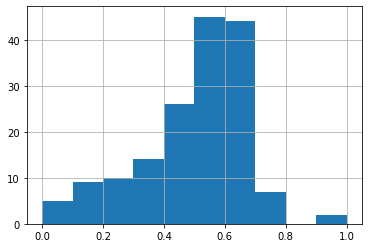

In [88]:
capacity_vs_population["score"].hist()